<a href="https://colab.research.google.com/github/ElcimarAires/Projetos-Pessoais/blob/main/ELT575_Semana4_118579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDADE FEDERAL DE VIÇOSA**
PÓS-GRADUAÇÃO EM INTELIGENCIA ARTIFICIAL E COMPUTACIONAL

DISCIPLINA: ELT575 APRENDIZADO PROFUNDO

NOME: ELCIMAR AIRES

MATRICULA: 118579

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Carregar o dataset CIFAR-10
dataset, info = tfds.load('cifar10', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Função para normalizar as imagens
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Aplicar a normalização ao conjunto de dados
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Adicionar cache, shuffle e batch para o conjunto de treinamento
train_dataset = train_dataset.cache().shuffle(info.splits['train'].num_examples).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(64).cache().prefetch(tf.data.experimental.AUTOTUNE)

# Carregar o modelo pré-treinado VGG16 sem as camadas superiores (headless)
base_model = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                         include_top=False,
                                         weights='imagenet')

# Congelar as camadas da base do modelo
base_model.trainable = False

# Adicionar novas camadas para classificação
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # Usando softmax para probabilidade
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nAcurácia no teste usando transfer learning com VGG16: {test_acc:.2f}')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TMHXZL_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TMHXZL_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4260 - loss: 1.6253 - val_accuracy: 0.5545 - val_loss: 1.2571
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5539 - loss: 1.2741 - val_accuracy: 0.5767 - val_loss: 1.2008
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5725 - loss: 1.2150 - val_accuracy: 0.5809 - val_loss: 1.1740
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5899 - loss: 1.1658 - val_accuracy: 0.6005 - val_loss: 1.1466
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5936 - loss: 1.1430 - val_accuracy: 0.5962 - val_loss: 1.1508
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6098 - loss: 1.1098 - val_accuracy: 0.6046 - val_loss: 1.1143
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/s

Modelo Pré-Treinado VGG16: A VGG16 é uma rede profunda com muitas camadas convolucionais, que geralmente captura muito bem características de imagens, o que a torna eficaz quando usada como base para transfer learning.

Camadas Totalmente Conectadas: Após a VGG16, as camadas densas ajudam a adaptar o modelo para a tarefa de classificação específica no CIFAR-10.

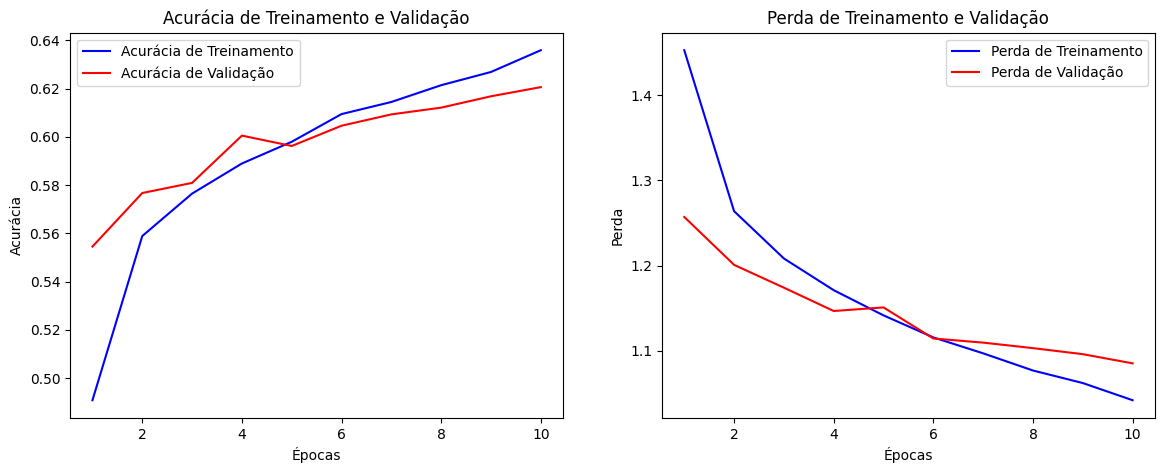

In [2]:
import matplotlib.pyplot as plt

# Função para plotar a acurácia e a perda
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotar a acurácia
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Acurácia de Treinamento')
    plt.plot(epochs, val_acc, 'r', label='Acurácia de Validação')
    plt.title('Acurácia de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plotar a perda
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Perda de Treinamento')
    plt.plot(epochs, val_loss, 'r', label='Perda de Validação')
    plt.title('Perda de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()

    plt.show()

# Chamar a função para plotar
plot_history(history)


Em que pese a velocidade na apuracao dos resultados tenha sido bem maior, a acurácia apurada quando montamos as redes manualmante foi maior do que quando utilizamos a VGG16, abaixo estao elencados os motivos que podem ter levado a este resultado:

**1. Tamanho e Complexidade do Dataset:**

CIFAR-10: Este é um dataset relativamente pequeno e simples comparado ao dataset ImageNet, para o qual o VGG16 foi originalmente treinado. A complexidade do VGG16 pode ser excessiva para CIFAR-10, levando ao que chamamos de "overfitting" (quando o modelo se ajusta demais ao conjunto de treinamento e não generaliza bem para novos dados).
Rede Manual: Quando você constrói uma rede manualmente com uma arquitetura mais simples, ela pode ser melhor adaptada à complexidade do CIFAR-10, resultando em melhor desempenho.

**2. Tamanho do Modelo e Overfitting:**

VGG16: É uma rede muito profunda e grande, com milhões de parâmetros. Isso pode fazer com que o modelo se ajuste excessivamente aos dados de treinamento, especialmente se o dataset for pequeno, como no caso do CIFAR-10.
Rede Manual: Redes menores e menos profundas têm menos capacidade de se ajustar excessivamente ao treinamento, o que pode melhorar a generalização para o conjunto de teste.

**3. Transfer Learning e Adaptação:**

Transfer Learning: Ao utilizar transfer learning, as camadas da VGG16 já vêm treinadas em um dataset (ImageNet) que pode conter características não diretamente aplicáveis ao CIFAR-10. As primeiras camadas da VGG16 capturam características muito gerais que podem não ser tão úteis para as pequenas imagens de baixa resolução do CIFAR-10.
Rede Manual: Quando você constrói uma rede específica para CIFAR-10, você pode projetá-la para extrair exatamente as características necessárias para este dataset, sem depender de características pré-treinadas que podem não ser relevantes.